In [1]:
from wbfm.utils.projects.finished_project_data import ProjectData
from wbfm.utils.general.utils_paper import apply_figure_settings
import plotly.express as px

/home/charles/anaconda3/envs/wbfm38/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


# Step 1: using my project class

Note: you will need to update the path if you are not on the cluster. If you have /scratch mounted, this might work:

fname = "Z:/neurobiology/zimmer/fieseler/wbfm_projects/2022-11-27_spacer_7b_2per_agar/ZIM2165_Gcamp7b_worm1-2022_11_28/project_config.yaml"

In [2]:
# Use a project with external stimulus as an additional behavior annotation
fname = "/lisc/scratch/neurobiology/zimmer/brenner/wbfm_projects/analyze/immobilized_wt/2023-09-19_11-42_worm1-2023-09-19/project_config.yaml"
project_data_gcamp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/lisc/scratch/neurobiology/zimmer/brenner/wbfm_projects/analyze/immobilized_wt/2023-09-19_11-42_worm1-2023-09-19 
With raw data in directory:
None 
See self.worm_posture_class for information on behavioral parameters
Found the following data files:
============Raw Videos=================
red_data:                 True
green_data:               True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Tracking===================
tracklets:                True
final_tracks:             True
manual_tracking:          True
============Traces=====================
traces:                   True




# Step 2: get the traces as a pandas dataframe

In [3]:
# For convinience, use pre-calculated traces that are used in the paper
df_traces = project_data_gcamp.calc_default_traces(use_paper_options=True)

  0%|          | 0/8 [00:00<?, ?it/s]

/home/charles/anaconda3/envs/wbfm38/lib/python3.8/site-packages/ppca/_ppca.py:82: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


In [4]:
df_traces.head()

neuron_001  neuron_002  neuron_003  neuron_004  neuron_005  neuron_006  \
0.00    0.075218    0.005290    0.150304    0.022157    0.019519    0.173652   
0.48    0.074625    0.004795    0.147364    0.021777    0.018753    0.171002   
0.96    0.072585    0.002668    0.140045    0.020208    0.017758    0.166279   
1.44    0.069985    0.001574    0.135107    0.020366    0.018613    0.160538   
1.92    0.065932   -0.001413    0.130057    0.020447    0.019310    0.154069   

         URAVL     OLQVR  neuron_009      RMER  ...  neuron_195  neuron_196  \
0.00  0.135834  0.043772    0.073163  0.063804  ...    0.126524   -0.008393   
0.48  0.136247  0.041767    0.072881  0.061643  ...    0.126567   -0.008498   
0.96  0.137757  0.038484    0.069993  0.059132  ...    0.126432   -0.006677   
1.44  0.137317  0.034486    0.061000  0.055368  ...    0.121467   -0.006303   
1.92  0.137603  0.031397    0.050878  0.053386  ...    0.119557   -0.005156   

      neuron_197  neuron_198      URXL     SMDDL  neuron_201  neuron_206  \
0.00    0.008489   -0.005573  0.013446  0.152065   -0.007952    0.021847   
0.48    0.010121   -0.006146  0.010564  0.153021   -0.009256    0.022324   
0.96    0.012940   -0.008230  0.002502  0.148157   -0.012283    0.024490   
1.44    0.014292   -0.007185 -0.006550  0.139747   -0.013213    0.025883   
1.92    0.013604   -0.008414 -0.014677  0.129930   -0.012520    0.027051   

          AIBL  neuron_211  
0.00  0.475122    0.010366  
0.48  0.470823    0.009508  
0.96  0.461470    0.007436  
1.44  0.452621    0.006853  
1.92  0.442477    0.004413  

[5 rows x 199 columns]

# Step 3: plot your favorite (no behavior at first)

I like the plotly library, because it is interactive.

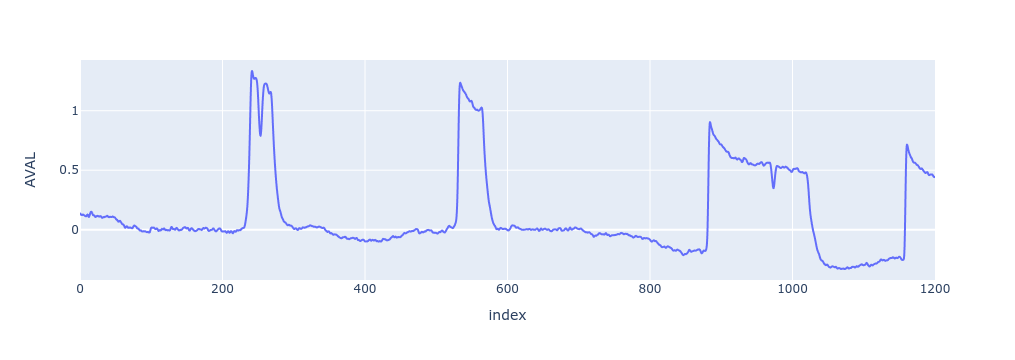

In [5]:
neuron_to_plot = 'AVAL'
fig = px.line(df_traces, y=neuron_to_plot)
fig.show()

## Additional options for making it prettier

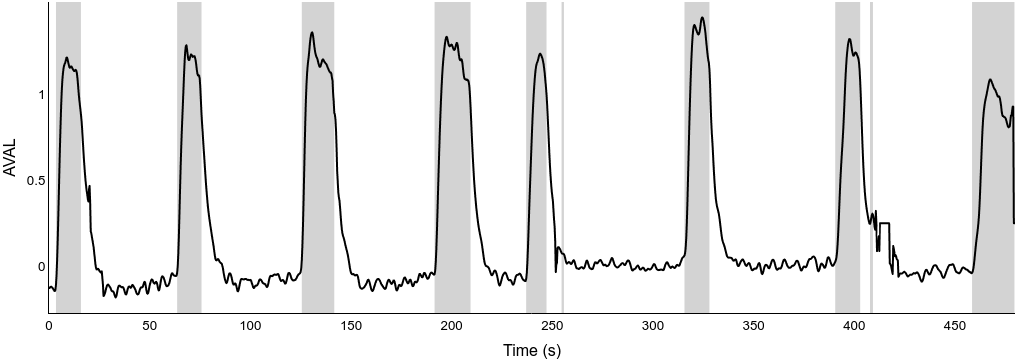

In [6]:
neuron_to_plot = 'AVAL'
fig = px.line(df_traces, y=neuron_to_plot, color_discrete_sequence=['black'])

project_data_gcamp.use_physical_time = True
xlabel = project_data_gcamp.x_label_for_plots

fig.update_xaxes(title_text=xlabel)

# This line adds the behavior shading
project_data_gcamp.shade_axis_using_behavior(plotly_fig=fig)


apply_figure_settings(fig, height_factor=0.2)
fig.show()

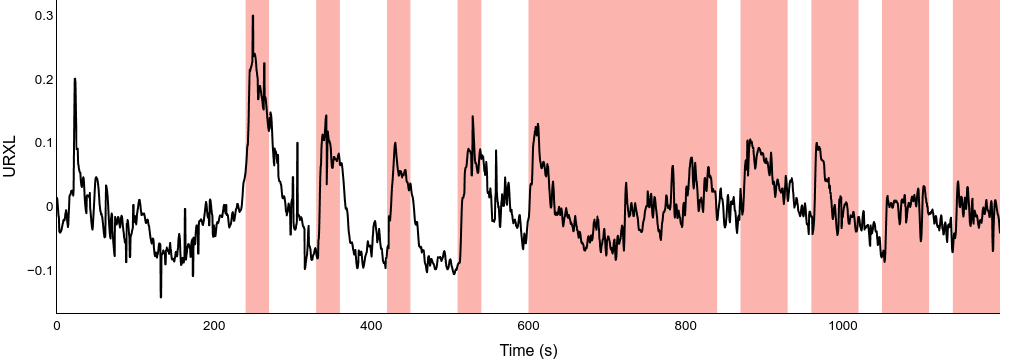

In [9]:
from wbfm.utils.general.utils_behavior_annotation import BehaviorCodes

neuron_to_plot = 'URXL'
fig = px.line(df_traces, y=neuron_to_plot, color_discrete_sequence=['black'])

project_data_gcamp.use_physical_time = True
xlabel = project_data_gcamp.x_label_for_plots

fig.update_xaxes(title_text=xlabel)

# This line adds the behavior shading, now with additional ones, and with reversal removed
# See BehaviorCodes for all behavior options
project_data_gcamp.shade_axis_using_behavior(plotly_fig=fig, 
                                             additional_shaded_states=[BehaviorCodes.STIMULUS],
                                             default_reversal_shading=False)


apply_figure_settings(fig, height_factor=0.2)
fig.show()

# Step 4 (optional): save

In [9]:
fname = f"{neuron_to_plot}_trace.png"
fig.write_image(fname)